In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tomatoleaf/tomato/cnn_train.py
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/0db85707-41f9-42df-ba3b-842d14f00a68___GHLB2 Leaf 8909.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/0fca6d09-1931-4767-a195-1dd2b7cd10b7___GHLB Leaf 8 Day 12.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/Tomato___Late_blight_original_0ba7d3d8-5c4c-4365-ba0c-69f61e96a36e___RS_Late.B 5312.JPG_0c8b3e88-9afa-41e1-a767-122ad7b27ac2.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/1b212ad6-e65a-4467-bfd1-9f9139070d33___GHLB2 Leaf 8609.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/1d6d043a-9df9-49ec-9b0f-e40a8e7f409f___RS_Late.B 5287.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/1d83eef4-92a0-42a2-9ea7-1ec2e683dbc0___GHLB2 Leaf 8809.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/01ebf21e-ef94-4c92-b007-0b26741c2fc8___GHLB2 Leaf 9075.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/1f38a263-cfb5-

In [35]:
import os
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread
import tensorflow as tf
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing import image

In [50]:
dataset_directory_location = '/kaggle/input/tomatoleaf/tomato'

In [51]:
os.listdir(dataset_directory_location)

['cnn_train.py', 'val', 'train']

In [52]:
train_dataset_location = os.path.join(dataset_directory_location, 'train')
test_dataset_location = os.path.join(dataset_directory_location, 'val')

In [53]:
os.listdir(train_dataset_location)

['Tomato___Late_blight',
 'Tomato___healthy',
 'Tomato___Early_blight',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Bacterial_spot',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Leaf_Mold',
 'Tomato___Spider_mites Two-spotted_spider_mite']

In [54]:
os.listdir(test_dataset_location)

['Tomato___Late_blight',
 'Tomato___healthy',
 'Tomato___Early_blight',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Bacterial_spot',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Leaf_Mold',
 'Tomato___Spider_mites Two-spotted_spider_mite']

In [41]:
correct_image_shape = (227, 227, 3)

In [42]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest',
                               rescale=1./255)

In [43]:
train_image_gen = image_gen.flow_from_directory(train_dataset_location, 
                                                target_size=correct_image_shape[:2], 
                                                color_mode='rgb', 
                                                batch_size=16, 
                                                class_mode='categorical')

test_image_gen = image_gen.flow_from_directory(test_dataset_location, 
                                                target_size=correct_image_shape[:2], 
                                                color_mode='rgb', 
                                                batch_size=16, 
                                                class_mode='categorical')

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [44]:
train_image_gen.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [45]:
test_image_gen.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [46]:
model = Sequential()


model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=correct_image_shape))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,322,314 (222.48 MB)

 Trainable params: 58,322,314 (222.48 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=2e-5), metrics=['accuracy'])

In [19]:
history = model.fit(train_image_gen, validation_data=test_image_gen, epochs=30)

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1724920776.279247     189 service.cc:145] XLA service 0x79869c011f90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724920776.279302     189 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/625 ━━━━━━━━━━━━━━━━━━━━ 2:05:11 12s/step - accuracy: 0.0625 - loss: 2.3050

I0000 00:00:1724920782.955155     189 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 245s 373ms/step - accuracy: 0.1870 - loss: 2.1438 - val_accuracy: 0.5450 - val_loss: 1.3145
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 263ms/step - accuracy: 0.5717 - loss: 1.2294 - val_accuracy: 0.6830 - val_loss: 0.8810
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 250ms/step - accuracy: 0.6812 - loss: 0.8980 - val_accuracy: 0.6360 - val_loss: 1.0126
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 147s 233ms/step - accuracy: 0.7367 - loss: 0.7386 - val_accuracy: 0.8130 - val_loss: 0.5464
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 235ms/step - accuracy: 0.7751 - loss: 0.6260 - val_accuracy: 0.7970 - val_loss: 0.5705
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 149s 236ms/step - accuracy: 0.8053 - loss: 0.5392 - val_accuracy: 0.8050 - val_loss: 0.5355
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 149s 236ms/step - accuracy: 0.8423 - loss: 0.4628 - val_accuracy: 0.8550 - val_loss: 0.4165
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 195s 309ms/step - accuracy: 0.8422 - loss: 0.44

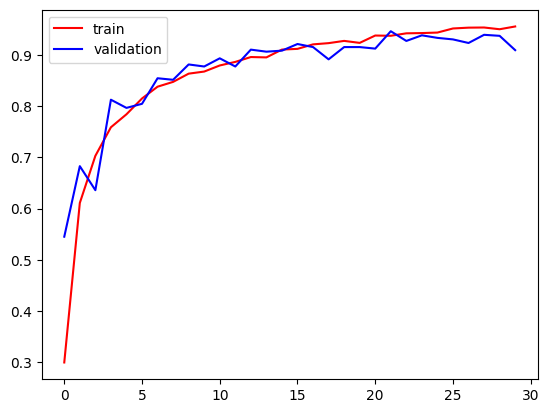

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red',label='train')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'validation')
plt.legend()
plt.show()


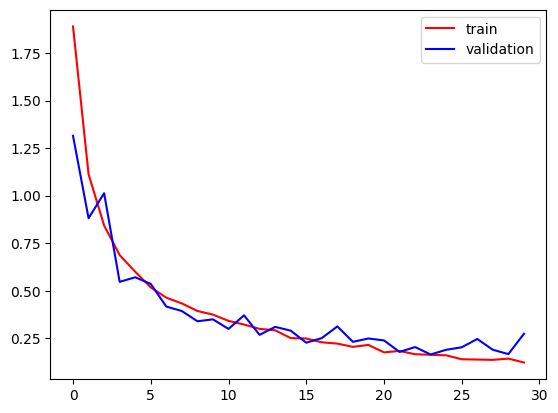

In [21]:
plt.plot(history.history['loss'],color = 'red',label='train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

In [22]:
model.evaluate(train_image_gen)[1]

625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 224ms/step - accuracy: 0.9516 - loss: 0.1363


0.9502000212669373

In [23]:
model.evaluate(test_image_gen)[1]

63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 218ms/step - accuracy: 0.9032 - loss: 0.2706


0.9039999842643738

In [25]:
sample_img_load = image.load_img('/kaggle/input/tomatoleaf/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite/782fdcff-07d9-4488-809e-f5af7d55b908___Com.G_SpM_FL 9483.JPG', target_size=correct_image_shape)

In [26]:
sample_img_to_arr = image.img_to_array(sample_img_load) / 255

In [27]:
sample_img_to_arr_expand_dim = np.expand_dims(sample_img_to_arr, 0) 

In [28]:
prediction = model.predict(sample_img_to_arr_expand_dim)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step


In [29]:
pred_result = np.argmax(prediction)

In [30]:
class_names = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

In [31]:
pred_final_result = class_names[pred_result]

In [32]:
pred_final_result

'Tomato___Spider_mites Two-spotted_spider_mite'

In [33]:
model.save('alexnet_model.h5')